# Estimating the gravity force

We implement here the linear Least Squares fitting method. The goal is to estimate the gravity force. In order to do so, we consider the law of motion of a body in free fall:\
$$x(t) = x_0 + v_0t + \frac{1}{2}gt^2$$
We set up an experiment: we throw a ball in the air, and we take some measurements (position of the ball with respect to the ground, and time).
We obtain the following data set:
Time (s)| Position (m)|
| --- | --- |
|$$0.1$$|$$0.14905$$|
|$$0.15$$|$$0.2603625$$|
|$$0.2$$|$$0.3962$$|
|$$0.35$$|$$0.9508625$$|
|$$0.4$$|$$1.1848$$|
|$$0.45$$|$$1.4432625$$|
|$$0.49$$|$$1.6676905$$|
|$$0.55$$|$$2.0337625$$|
|$$0.57$$|$$2.1636345$$|
|$$0.6$$|$$2.3658$$|

**Question:** what is the estimated value of the gravity force $g$?

In [1]:
# We import numpy (Python package that we need for the linear LS)
import numpy

In [2]:
# We generate the data set (time and positions)
t = numpy.array([0.1, 0.15, 0.2, 0.35, 0.4, 0.45, 0.49, 0.55, 0.57, 0.6])
b = numpy.array([0.14905, 0.2603625, 0.3962, 0.9508625, 1.1848, 1.4432625, 1.6676905, 2.0337625, 2.1636345, 2.3658])

Next we build the Vandermonde matrix 
$$ A = \begin{pmatrix}
1 & t_1 & t_1^2\\
1 & t_2 & t_2^2\\
1 & t_3 & t_3^2\\
1 & t_4 & t_4^2
\end{pmatrix}$$

To do so, we can use the numpy buil-in function *numpy.vander(t, deg, increasing=bool)*.

In [3]:
A = numpy.vander(t, 3, increasing=True)

We now build the symmetric square matrix and the right hand side of the linear system that we will solve to find the Least Squares solution.

In [4]:
A_sym = numpy.dot(A.T, A)
b_sym = numpy.dot(A.T, b)

In [5]:
# Solve the linear system
x = numpy.linalg.solve(A_sym , b_sym)

In [7]:
# The estimated gravity force can be found in the third component of the solution vector x: x[2] = 0.5*g.
print("Estimated gravity force: ", 2*x[2])

Estimated gravity force:  9.810000000000054


We now plot the data that we measured and the obtained polynomial of degree $2$ that fits the data.

In [8]:
# Importing matplotlib (Python package for plotting)
import matplotlib.pyplot as plt

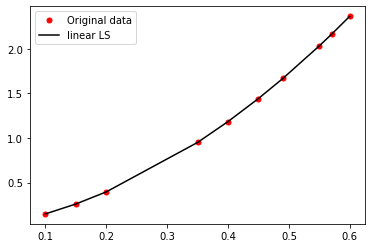

In [11]:
_ = plt.plot(t, b, 'or', label='Original data', markersize=5)
_ = plt.plot(t, x[0] + x[1]*t + x[2]*t**2, 'k', label='linear LS')
_ = plt.legend()
plt.show()

**Task 1:** look for the buil-in function in *numpy* that does the exact same thing as the previous lines.

We consider now a data set with some errors in the measures:

Time (s)| Position (m)|
| --- | --- |
|$$0.1$$|$$0.15905$$|
|$$0.15$$|$$0.2903625$$|
|$$0.2$$|$$0.4212$$|
|$$0.35$$|$$1.0708625$$|
|$$0.4$$|$$1.2048$$|
|$$0.45$$|$$1.5332625$$|
|$$0.49$$|$$3.6676905$$|
|$$0.55$$|$$3.0137625$$|
|$$0.57$$|$$3.4636345$$|
|$$0.6$$|$$2.366$$|

**Task 2:** run the standard Least Squares procedure and compare the result for $g$. What is happening?

**Task 3:** Consider the following diagonal matrix:
$$ W = diag(10^4, 1.1\times 10^3,1.6\times10^3, 69.5, 2.5\times10^3, 1.2345679\times10^2, 0.25, 1.04123282, 0.591715976, 2.5\times10^7)$$

and the previous data set. Find the Least Squares solution by using the symmetric square matrix $$A^TWA$$

and the vector $$A^TWb$$

where $b$ is the new vector of measured positions. What has changed? Compare the results with the previous ones.